<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [77]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-05-31 11:04:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.1'

     0K .......... .......... .......... .......... ..........  0% 48.4K 12m19s
    50K .......... .......... .......... .......... ..........  0% 83.5K 9m43s
   100K .......... .......... .......... .......... ..........  0% 64.4K 9m33s
   150K .......... .......... .......... .......... ..........  0% 34.6K 11m26s
   200K .......... .......... .......... .......... ..........  0% 97.6K 10m21s


Connect to the database.


In [78]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [79]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [27]:
MAST = """
SELECT * FROM master
"""
dfs = pd.read_sql_query(MAST,conn)
dfs[["Age"]].head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [129]:
QUERY = """
SELECT *
FROM DevType
"""
tf = pd.read_sql_query(QUERY,conn)
tf.head()

,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"


In [130]:
# SQL query to retrieve the count of each developer type
query = """
SELECT DevType, COUNT(*) AS Count
FROM DevType
GROUP BY DevType
"""

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Sort the DataFrame by count in descending order
df_sorted = df.sort_values('Count', ascending=False)

# Extract the majority developer type (first row with highest count)
majority_dev_type = df_sorted['DevType'].iloc[0]

print("Majority of the survey responders are:", majority_dev_type)


Majority of the survey responders are: Developer, full-stack


## Demo: How to run a group by query


In [127]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn).head()

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [25]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [47]:
table_nam = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_nam)

dfs = pd.read_sql_query(QUERY,conn)
print(dfs.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [128]:
dfs = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY Respondent DESC" ,conn) 
dfs.head()

,Respondent,DatabaseDesireNextYear
0,49,Cassandra
1,44,Other(s):
2,23,Couchbase
3,22,Oracle
4,20,MariaDB


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [80]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



In [81]:
import plotly.express as px
import plotly.graph_objects as go

### Box Plots


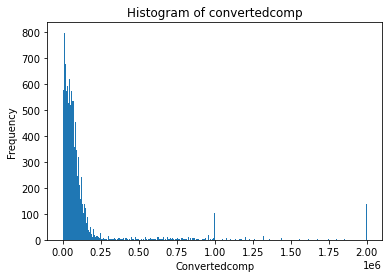

In [15]:
import matplotlib.pyplot as plt

# Get the column data from the DataFrame
column_data = pd.read_sql_query('SELECT ConvertedComp FROM {}'.format(table_name), conn)['ConvertedComp']

# Plot the histogram
plt.hist(column_data, bins='auto')
plt.xlabel('Convertedcomp')
plt.ylabel('Frequency')
plt.title('Histogram of convertedcomp')

# Show the histogram
plt.show()


Plot a box plot of `Age.`


<AxesSubplot:>

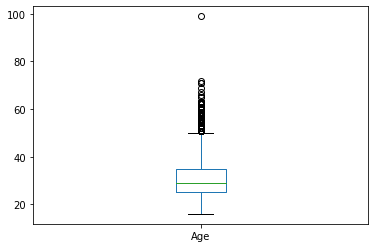

In [32]:
df = pd.read_sql_query("SELECT * FROM master" ,conn)  

df.boxplot(column =['Age'],grid=False)


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


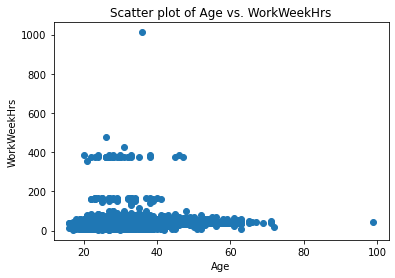

In [33]:
# your code goes here
df = pd.read_sql_query("SELECT * FROM master" ,conn)  
age_data = df['Age']
workweekhrs_data = df['WorkWeekHrs']

# Create a scatter plot
plt.scatter(age_data, workweekhrs_data)
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter plot of Age vs. WorkWeekHrs')

# Show the scatter plot
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


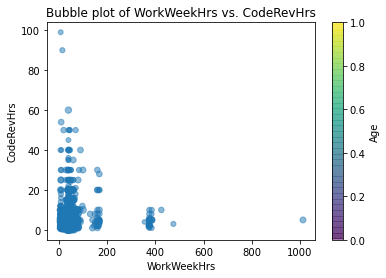

In [46]:
# your code goes here
import matplotlib.pyplot as plt

# SQL query to retrieve 'WorkWeekHrs', 'CodeRevHrs', and 'Age' columns from the "master" table
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Extract the 'WorkWeekHrs', 'CodeRevHrs', and 'Age' column data
workweekhrs_data = df['WorkWeekHrs']
coderevhrs_data = df['CodeRevHrs']
age_data = df['Age']

# Create a bubble plot
plt.scatter(workweekhrs_data, coderevhrs_data, s=age_data, alpha=0.5)
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.title('Bubble plot of WorkWeekHrs vs. CodeRevHrs')
plt.colorbar(label='Age')

# Show the bubble plot
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


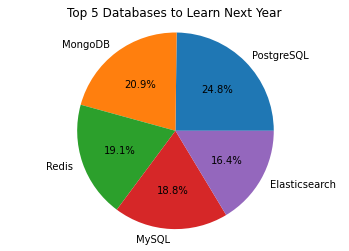

In [99]:

# SQL query to retrieve the count of each database respondents wish to learn next year
query = "SELECT DatabaseDesireNextYear, COUNT(*) AS Count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY COUNT(*) DESC LIMIT 5"

# Execute the query and fetch the data into a DataFrame
dfs = pd.read_sql_query(query, conn)

# Extract the top 5 databases and their counts
top_databases = dfs['DatabaseDesireNextYear'].tolist()
database_counts = dfs['Count'].tolist()

# Create the pie chart
plt.pie(database_counts, labels=top_databases, autopct='%1.1f%%')
plt.title("Top 5 Databases to Learn Next Year")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()



In [104]:
import pandas as pd

# SQL query to retrieve the count of each language respondents wish to learn next year, ranked by counts
query = "SELECT LanguageDesireNextYear, COUNT(*) AS Count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY COUNT(*) DESC"

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Find the rank of Python
python_rank = df[df['LanguageDesireNextYear'] == 'Python'].index[0] + 1

print("Rank of Python: ", python_rank)


Rank of Python:  3


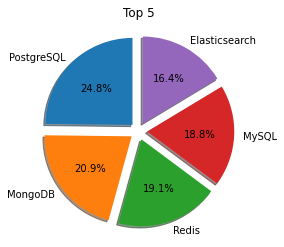

In [95]:
QUERY = """

select count(DatabaseDesireNextYear) 
as Count,DatabaseDesireNextYear 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5

"""
df4 = pd.read_sql_query(QUERY,conn)
df4.set_index('DatabaseDesireNextYear', inplace=True)
lab = df4.index 
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1]
sizes = df4.iloc[:,0]
plt.pie(sizes, labels = lab , startangle=90,shadow=True,autopct='%1.1f%%', explode=explode_list)
plt.title('Top 5')
plt.show()

In [109]:
QUERY = """

select count(DatabaseWorkedWith) 
as Count,DatabaseWorkedWith 
from DatabaseWorkedWith
where DatabaseWorkedWith = 'SQL'
group by DatabaseWorkedWith
order by count(DatabaseWorkedWith)

"""
df5 = pd.read_sql_query(QUERY,conn)
df5

,Count,DatabaseWorkedWith


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


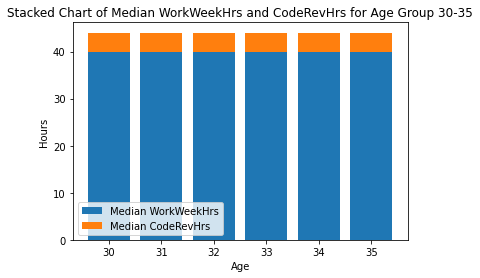

In [56]:
# SQL query to retrieve the WorkWeekHrs and CodeRevHrs for the age group 30 to 35
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master WHERE Age >= 30 AND Age <= 35"

# Execute the query and fetch the data into a DataFrame
dfs = pd.read_sql_query(query, conn)

# Group the data by Age and calculate the median of WorkWeekHrs and CodeRevHrs
grouped_df = dfs.groupby('Age').median()

# Extract the relevant data
age_group = grouped_df.index.tolist()
median_work_week_hrs = grouped_df['WorkWeekHrs'].tolist()
median_code_rev_hrs = grouped_df['CodeRevHrs'].tolist()

# Plotting the stacked chart
plt.bar(age_group, median_work_week_hrs, label='Median WorkWeekHrs')
plt.bar(age_group, median_code_rev_hrs, bottom=median_work_week_hrs, label='Median CodeRevHrs')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

# Adding a legend
plt.legend()

# Display the chart
plt.show()


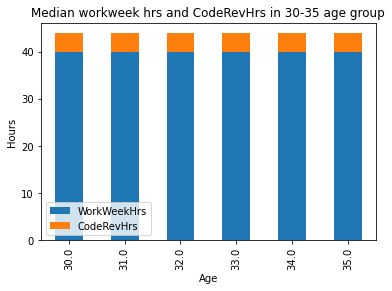

In [67]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_wk = pd.read_sql_query(QUERY,conn)

df_g=df_wk.groupby('Age').median()

df_g.plot(kind='bar',stacked=True)
plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

In [66]:
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master WHERE Age >= 30 AND Age <= 35"
# Execute the query and fetch the data into a DataFrame
df = pd.read_sql_query(query, conn)
df

,Age,WorkWeekHrs,CodeRevHrs
0,31.0,8.0,3.0
1,34.0,40.0,2.0
2,32.0,40.0,2.0
3,34.0,42.0,15.0
4,33.0,40.0,2.0
...,...,...,...
2937,32.0,42.0,4.0
2938,32.0,50.0,2.0
2939,32.0,56.0,14.0
2940,34.0,40.0,5.0


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


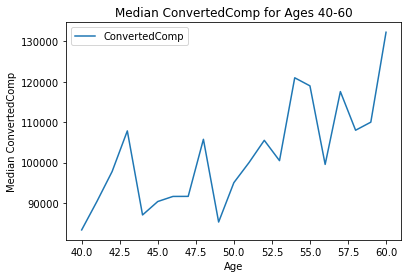

In [71]:
# your code goes here

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 40 AND 60
"""
df_wks = pd.read_sql_query(QUERY,conn)

df_gs=df_wks.groupby('Age').median()

# Plot the line chart
df_gs.plot(kind='line', y='ConvertedComp', xlabel='Age', ylabel='Median ConvertedComp', title='Median ConvertedComp for Ages 40-60')

# Display the chart
plt.show()


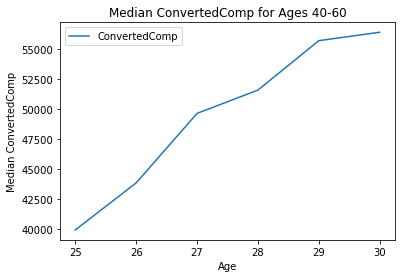

In [131]:
# your code goes here

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""
df_wks = pd.read_sql_query(QUERY,conn)

df_gs=df_wks.groupby('Age').median()

# Plot the line chart
df_gs.plot(kind='line', y='ConvertedComp', xlabel='Age', ylabel='Median ConvertedComp', title='Median ConvertedComp for Ages 40-60')

# Display the chart
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


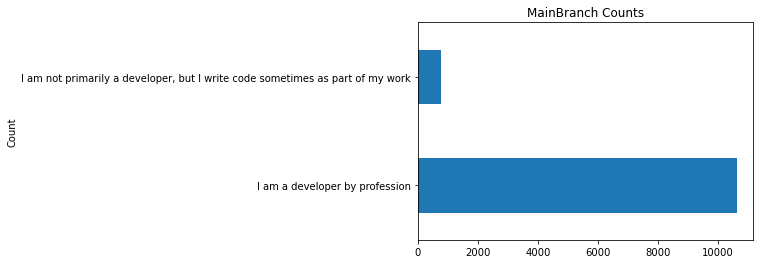

In [74]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df_w = pd.read_sql_query(QUERY,conn)

branch_counts = df_w['MainBranch'].value_counts()

# Plot the horizontal bar chart
branch_counts.plot(kind='barh', xlabel='Count', ylabel='MainBranch', title='MainBranch Counts')

# Display the chart
plt.show()


In [75]:
QUERY = """
SELECT MainBranch
FROM master
"""
df_w = pd.read_sql_query(QUERY,conn)
df_w.value_counts()

MainBranch                                                                   
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
dtype: int64

Close the database connection.


In [76]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
